In [2]:
import numpy
import shutil
import sys
import os
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
DATA = {}
PATH = "../data/PlantVillage/"
BASE = '../data/'
TRAIN_FOLDER = BASE + 'train/'
TEST_FOLDER = BASE + 'test/'
VALI_FOLDER = BASE + 'validation/'
DEFAULT_IMG_SIZE = tuple((256,256))


In [20]:
def sortImages():
    
    os.mkdir(TRAIN_FOLDER)
    os.mkdir(TEST_FOLDER)
    os.mkdir(VALI_FOLDER)

    folders = os.listdir(PATH)
    for folder in folders:
        print('[INFO] PROCESSING {}'.format(folder))
        tf = TRAIN_FOLDER+folder
        tef = TEST_FOLDER + folder
        vf = VALI_FOLDER + folder
        
        os.mkdir(tf)
        os.mkdir(tef)
        os.mkdir(vf)
        
        images = os.listdir(PATH+folder)
        
        for image in images[:int(0.8*len(images))]:
            count+=1
            shutil.copyfile('{}{}/{}'.format(PATH,folder,image),'{}{}/{}'.format(TRAIN_FOLDER,folder,image))
        for image in images[int(0.8*len(images)):int(0.9*len(images))]:
            count+=1
            shutil.copyfile('{}{}/{}'.format(PATH,folder,image),'{}{}/{}'.format(TEST_FOLDER,folder,image))
        for image in images[int(0.9*len(images)):]:
            count+=1
            shutil.copyfile('{}{}/{}'.format(PATH,folder,image),'{}{}/{}'.format(VALI_FOLDER,folder,image))
                    
        print()
            

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(TRAIN_FOLDER,
                                             target_size = (256,256),
                                             batch_size = 20,
                                             color_mode = 'grayscale',
                                             class_mode = 'categorical')
validation_gen = test_datagen.flow_from_directory(VALI_FOLDER,
                                             target_size = (256,256),
                                             batch_size = 20,
                                             class_mode = 'categorical',
                                             color_mode = 'grayscale')

Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


In [26]:
for data_batch, labels_batch in validation_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 256, 256, 1)
labels batch shape: (20, 15)


In [18]:
model = Sequential()
model.add(Conv2D(8,(3,3),activation = 'relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(15,activation = 'softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 8)       80        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28800)             0         
__________

In [25]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [30]:
history = model.fit_generator(train_gen,
                              steps_per_epoch = 825,
                              epochs = 20,
                              validation_data = validation_gen,
                              validation_steps = 100)

Epoch 1/20
 17/825 [..............................] - ETA: 3:11 - loss: 0.0645 - acc: 0.9765

KeyboardInterrupt: 

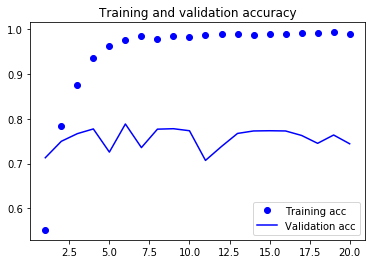

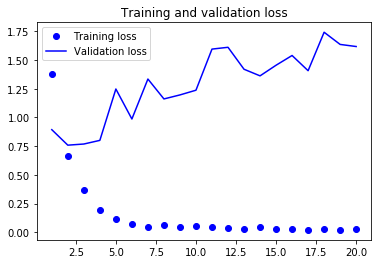

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()